# Analyze One Quantitative and One Qualitative Variable


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("operations.csv",parse_dates=[0])

In [2]:
X = "categ" # qualitative
Y = "amount" # quantitative

# Only expenses are retained
sub_sample = data[data["amount"] < 0].copy()
# Expenses are converted to positive amounts
sub_sample["amount"] = -sub_sample["amount"]
# Rents are not included because too large:
sub_sample = sub_sample[sub_sample["categ"] != "RENT"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_8868\1964516553.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=categories, showfliers=False, medianprops=medianprops,


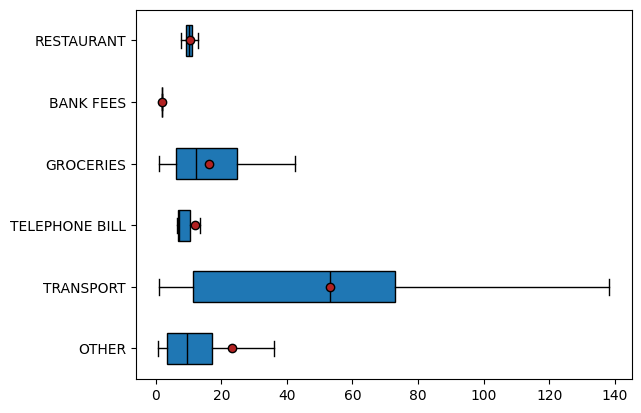

In [3]:
categories = sub_sample[X].unique()
groups = []
for m in categories:
    groups.append(sub_sample[sub_sample[X]==m][Y])
    
# Graph properties (not very important)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
            
plt.boxplot(groups, labels=categories, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [ ]:
X = "categ" # qualitative
Y = "amount" # quantitative

sub_sample = data[data["amount"] < 0] # Only expenses are retained 

def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS
 
eta_squared(sub_sample[X],sub_sample[Y])

np.float64(0.39841890401094926)